# **Curso**: Deep Learning

[<img align="right" width="400" height="100" src="https://assets.website-files.com/5f909dbbf6ef7c3b428e2522/60f4592942eda3c0ffb35bfd_Logo_QLAB.svg">](https://qlab.pucp.edu.pe/)


[Pedro Achanccaray](mailto:p.diaz@tu-bs.de), y [Smith Arauco](mailto:saraucoc@uni.pe).

[Pontificia Universidad Católica del Perú](https://www.pucp.edu.pe/)  
[Laboratorio de Inteligencia Artificial y Métodos Computacionales en Ciencias Sociales](https://qlab.pucp.edu.pe/formacion-continua)

# **Lab 1.1:Función para convertir de Celsius a Fahrenheit**

En esta sesión vamos a entrenar una **red neuronal artificial** para aprender una **función**.

Para poder entender mejor los conceptos relacionados a las redes neuronales, vamos a usar una **función conocida** como la **conversión** entre grados **Celsius** y **Fahrenheit**.

$ Fahrenheit = Celsius * 1.8 + 32$

**Importante:** para este ejemplo no necesitamos una GPU, asi que si estas usando Google Colab, puedes seleccionar como _Ambiente de Ejecución (Runtime): CPU_.

## **Conociendo Google Colab**

El ambiente Google Colab nos permite ejecutar codigo ***Python*** en nuestro navegador:
*   Sin ninguna configuración previa
*   Acceso gratuito a GPUs
*   Facil de compartir

Para mayor información, visistar lo siguientes links:
*   [¿Qué es Google Colab?](https://colab.research.google.com/notebooks/intro.ipynb)
*   [¿Como montar el Google Drive para ser usado en Google Colab?](https://colab.research.google.com/notebooks/io.ipynb)

### Operaciones basicas

Podemos comenzar a ejecutar algunas operaciones matemáticas en Google Colab.
```python
5+5
```
```python
5*5
```
```python
((5+5)*5+20)/15
```
Existen 3 métodos para ejecutar una celda:
* Apretar el boton de play al inicio de la celda.
* Presionar ***CTRL + ENTER***.
* Presionar ***SHIFT + ENTER***, lo cual agregará una celda al final.

In [ ]:
5+5

10

## **Cargando librerias**

Importando los packages de Python necesarios para nuestra aplicación

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import numpy as np

## **Conjunto de datos**

Debido a que conocemos la función que vamos a aprender usando la red neuronal, podemos tabular algunos valores para crear nuestro conjunto de datos de entrenamiento.

Vamos a usar los siguientes datos:

**Celsius**: Datos de Entrada

**Fahrenheit**: salida

<center>

| Celsius | Fahrenheit |
|:-------:|:----------:|
|   -40   |     -40    |
|   -10   |     14     |
|    0    |     32     |
|    8    |     46     |
|    15   |     59     |
|    22   |     72     |
|    38   |     100    |

</center>

Declarando variables para almacenar los datos de entrada

In [24]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38],
                   dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100],
                      dtype=float)

## **Red neuronal simple o Perceptron**

Red Neuronal con la siguiente arquitectura:
- **Capa de Entrada**: 1 neurona (1 peso sináptico: $w$, 1 bias: $b$)
- **Capa de Salida**: 1 neurona (salida: $y$)

La salida se obtiene de la siguiente manera:

$y = w*x + b$

donde: $x$ es la entrada

In [25]:
layer = Dense(units=1, input_shape=[1])

model = Sequential([
                    layer
                    ], name="Perceptron")

model.summary()

Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Preguntas:**
- ¿Cuántos parametros (pesos) tiene la red neuronal?
- ¿Cómo podemos calcular el número de parámetros?

### **Configuración de la red**

Ahora necesitamos definir los siguiente parámetros de la red neuronal:
- **loss**: función de pérdida (loss function).
- **optimizer**: método de optimización para disminuir la función de pérdida.

Vamos a usar el `mean_squared_error` ($MSE$) como función de pérdida:

$MSE = \frac{1}{n}*\sum^n_{i=1}(y_i - \hat{y_i})^2$

donde:
- $n$: numero de muestras
- $y_i$: salida de la $i$
- $\hat{y_i}$: salida esperada para la muestra $i$

In [26]:
model.compile(optimizer=Adam(learning_rate=0.1),
              loss='mean_squared_error'
              )

### **Entrenamiento**

Con el método `fit` comenzamos el entrenamos el modelo.

En este proceso, los pesos serán ajustados para minimizar la función de pérdida.

**Importante:** No olvidar de seguir los pasos mostrados: Crear el modelo (`Sequential`) y configurarlo (`model.compile`).

In [27]:
history = model.fit(celsius,
                    fahrenheit,
                    epochs=1000,
                    verbose=False)

In [28]:
history.history.keys()

dict_keys(['loss'])

Ahora podemos visualizar la curva de entrenamiento del modelo, para analizar como fue variando la función de pérdida con cada época.

Una época es cuando todo el conjunto de datos ha sido procesado por el modelo. El conjunto de datos es procesado por el modelo varias veces (número de épocas) y los pesos son modificados en cada época.

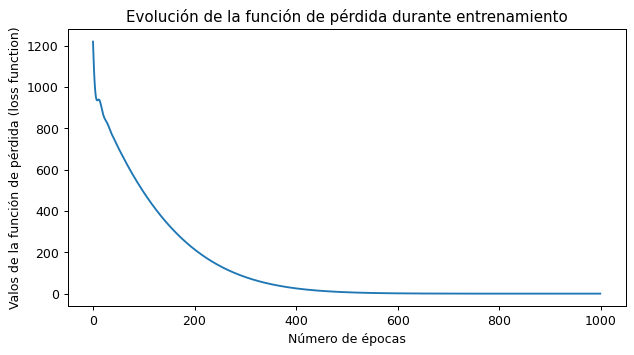

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4), dpi=90)
plt.plot(history.history["loss"])
plt.title("Evolución de la función de pérdida durante entrenamiento")
plt.xlabel("Número de épocas")
plt.ylabel("Valos de la función de pérdida (loss function)")
plt.show()

### **Probando el modelo**

Ahora podemos probar el modelo entrenado pasando valores que nunca vio durante el entrenamiento.

In [30]:
new_value = 100.0
result = model.predict([new_value],
                       verbose=0)

print("Predicción:\n{} grados Celsius son {} grados Fahrenheit".format(new_value,
                                                                       result[0][0]))
print("\nSalida esperada:\n{} grados Celsius son {} grados Fahrenheit".format(new_value,
                                                                            1.8*new_value + 32))

Predicción:
100.0 grados Celsius son 211.74404907226562 grados Fahrenheit

Salida esperada:
100.0 grados Celsius son 212.0 grados Fahrenheit


### **Pesos del modelo**

Tambien podemos ver el conocimiento adquirido por el modelo, lo cual se encuentra en los **pesos sinápticos** y el **bias**.

Recordando que al tener solo una neurona, la red calcula la salida de la siguiente manera:

$y = w*x + b$

In [31]:
print(layer.get_weights())

[array([[1.7981342]], dtype=float32), array([31.930628], dtype=float32)]


Podemos comparar el resultado con la función de conversión de grados Celsius para Fahrenheit:

$ Fahrenheit = Celsius * 1.8 + 32$

## **Red neuronal con capas ocultas o Multi Layer Perceptron (MLP)**

Ahora usaremos una red neuronal más compleja con la siguiente arquitectura:
- **Capa de Entrada**: 1 neurona
- **Capa Oculta 1**: 3 neuronas
- **Capa Oculta 2**: 3 neuronas
- **Capa Oculta 3**: 3 neuronas
- **Capa de Salida**: 1 neurona

In [32]:
hidden1 = Dense(units=3, input_shape=[1], name="Oculta_1")
hidden2 = Dense(units=3, name="Oculta_2")
hidden3 = Dense(units=3, name="Oculta_3")
output = Dense(units=1, name="Salida")

model2 = Sequential([
                     hidden1,
                     hidden2,
                     hidden3,
                     output
                     ], name="MLP")

model2.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Oculta_1 (Dense)            (None, 3)                 6         
                                                                 
 Oculta_2 (Dense)            (None, 3)                 12        
                                                                 
 Oculta_3 (Dense)            (None, 3)                 12        
                                                                 
 Salida (Dense)              (None, 1)                 4         
                                                                 
Total params: 34 (136.00 Byte)
Trainable params: 34 (136.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Pregunta:**
- ¿Cómo se calcula el número de parámetros para las capas ocultas 1, 2, y 3?

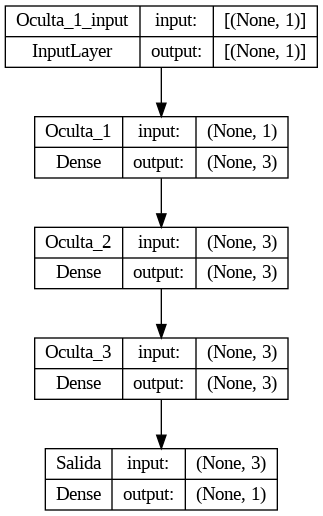

In [33]:
from tensorflow.keras.utils import plot_model

plot_model(model2, to_file="my_model.png", show_shapes=True)

### **Configuración de la red**

Compilamos el modelo

In [34]:
model2.compile(optimizer=Adam(learning_rate=0.1),
               loss='mean_squared_error'
               )

### **Entrenamiento**

Y procedemos a entrenar el modelo

In [35]:
history2 = model2.fit(celsius, fahrenheit, epochs=1000, verbose=False)

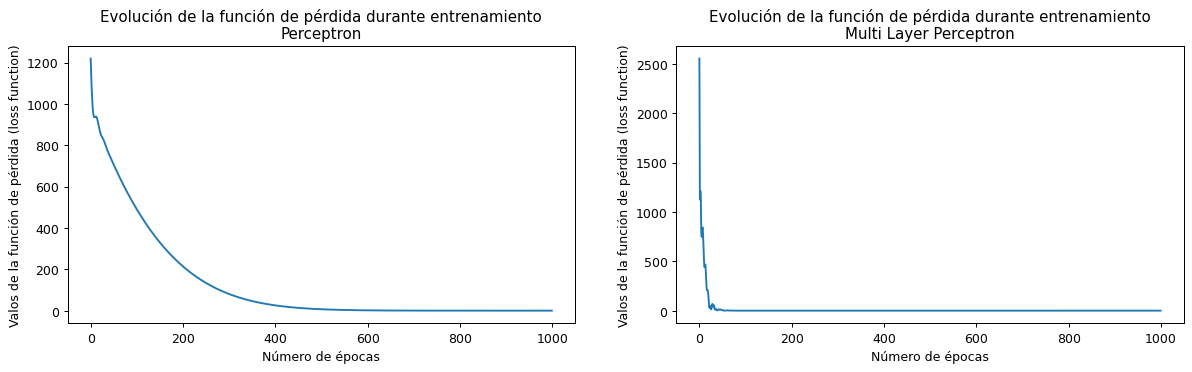

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4), dpi=90)

plt.subplot(1,2,1)
plt.plot(history.history["loss"])
plt.title("Evolución de la función de pérdida durante entrenamiento\nPerceptron")
plt.xlabel("Número de épocas")
plt.ylabel("Valos de la función de pérdida (loss function)")

plt.subplot(1,2,2)
plt.plot(history2.history["loss"])
plt.title("Evolución de la función de pérdida durante entrenamiento\nMulti Layer Perceptron")
plt.xlabel("Número de épocas")
plt.ylabel("Valos de la función de pérdida (loss function)")

plt.show()

### **Probando el modelo**

In [41]:
new_value = 100.0
result = model.predict([new_value],
                       verbose=0)

result2 = model2.predict([new_value],
                         verbose=0)

print("Predicción Perceptron:\n{} grados Celsius son {} grados Fahrenheit".format(new_value,
                                                                                  result[0][0]))
print("Predicción MLP:\n{} grados Celsius son {} grados Fahrenheit".format(new_value,
                                                                           result2[0][0]))
print("\nSalida esperada:\n{} grados Celsius son {} grados Fahrenheit".format(new_value,
                                                                            1.8*new_value + 32))


Predicción Perceptron:
100.0 grados Celsius son 211.74404907226562 grados Fahrenheit
Predicción MLP:
100.0 grados Celsius son 211.74745178222656 grados Fahrenheit

Salida esperada:
100.0 grados Celsius son 212.0 grados Fahrenheit


### **Pesos del modelo**

In [46]:
for layer in model2.layers:
  print("Capa:", layer.name)
  print("Pesos:", layer.get_weights(),"\n")

Capa: Oculta_1
Pesos: [array([[ 0.63845456, -0.04961553,  0.07753721]], dtype=float32), array([ 2.703503 ,  1.3272448, -2.0837252], dtype=float32)] 

Capa: Oculta_2
Pesos: [array([[ 1.0917209 ,  0.18768825, -0.00142903],
       [-0.24348892,  0.13111794, -0.6705141 ],
       [-0.3405653 , -0.26901475, -0.04527886]], dtype=float32), array([ 2.6721394, -0.6821628, -2.6091487], dtype=float32)] 

Capa: Oculta_3
Pesos: [array([[-0.13924843,  1.0636858 ,  0.9233777 ],
       [ 0.4681974 ,  0.31129554, -0.22633134],
       [-0.3142001 , -0.9394849 , -0.2664153 ]], dtype=float32), array([-2.3110337,  2.6258698,  2.646132 ], dtype=float32)] 

Capa: Salida
Pesos: [array([[-0.5036541],
       [ 1.337787 ],
       [ 1.3187836]], dtype=float32), array([2.6173263], dtype=float32)] 



Podemos comparar el resultado con la función de conversión de grados Celsius para Fahrenheit:

$ Fahrenheit = Celsius * 1.8 + 32$